In [6]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
%matplotlib inline

In [7]:
#Reading input files
df = pd.read_csv("Documents/JK/MercedesBenz_Challenge/train.csv")
df_test = pd.read_csv("Documents/JK/MercedesBenz_Challenge/test.csv")

In [8]:
#Exploratory Data Analysis
#Checking sample size
print df.shape, df_test.shape

(4209, 378) (4209, 377)


In [9]:
#Checking for null values
mis_val_1 = df.isnull().any().value_counts()  
mis_val_2 = (len(df.index)-df.count()).sort_values(ascending=False).values.tolist()
print mis_val_1
print mis_val_2
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df)

False    378
dtype: int64
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

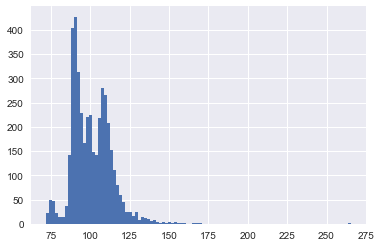

In [10]:
#Checking for Outliers
df['y'].hist(bins=100)

/anaconda/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


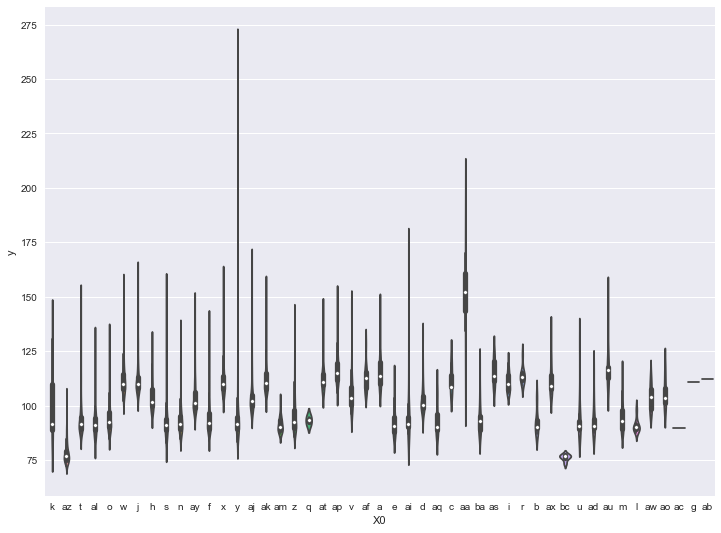

/anaconda/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


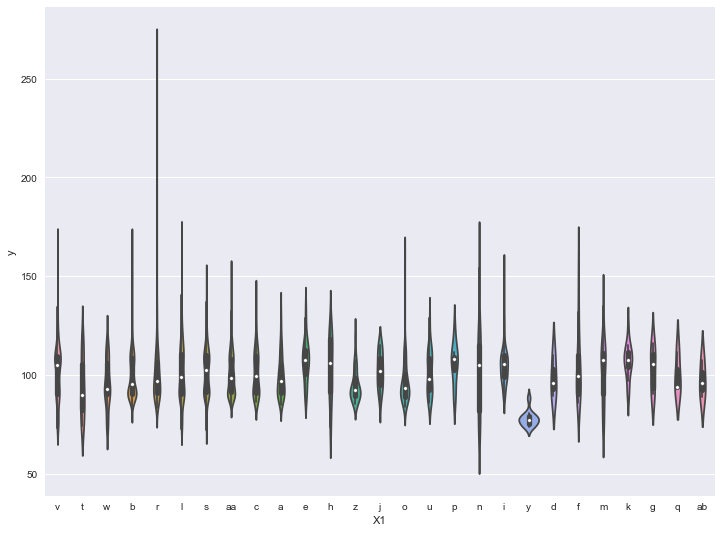

/anaconda/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


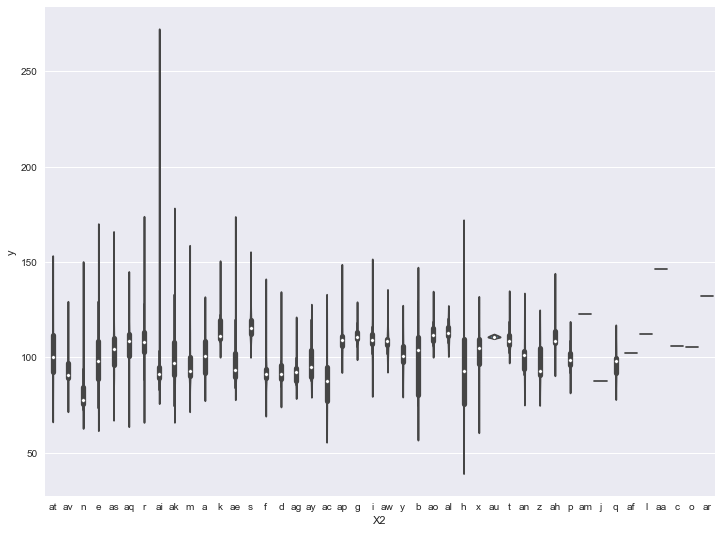

/anaconda/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


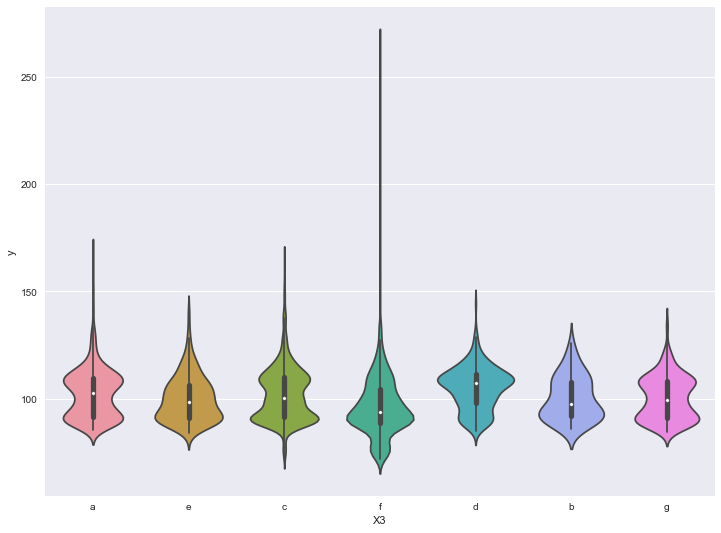

/anaconda/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


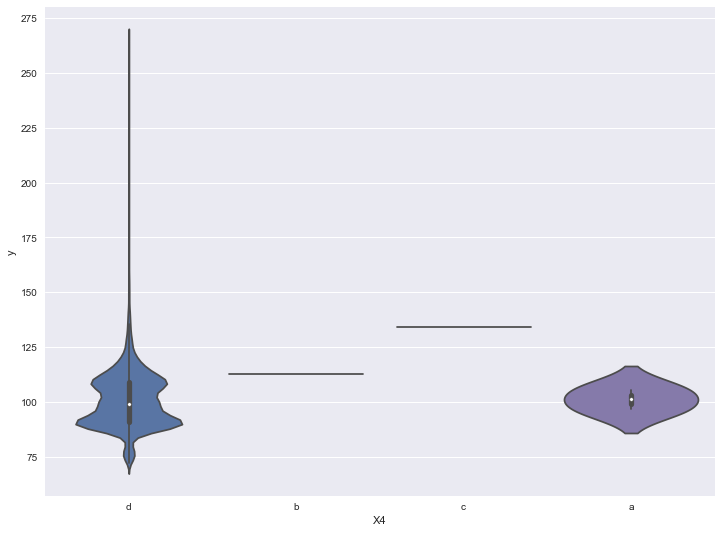

/anaconda/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


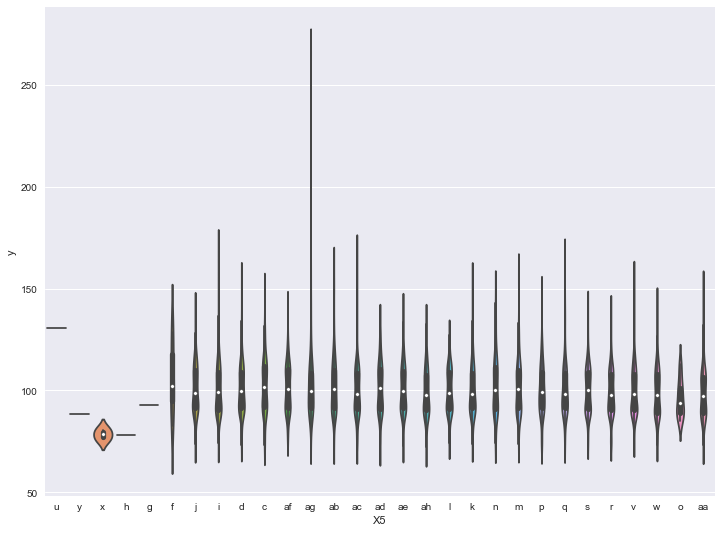

/anaconda/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


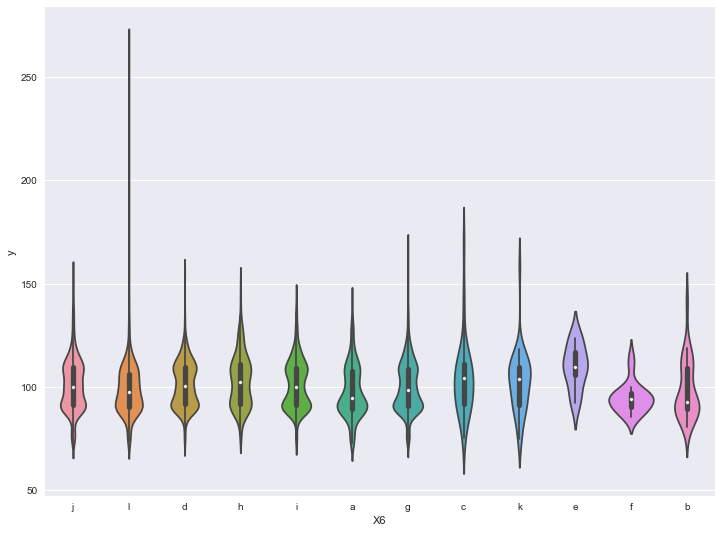

/anaconda/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


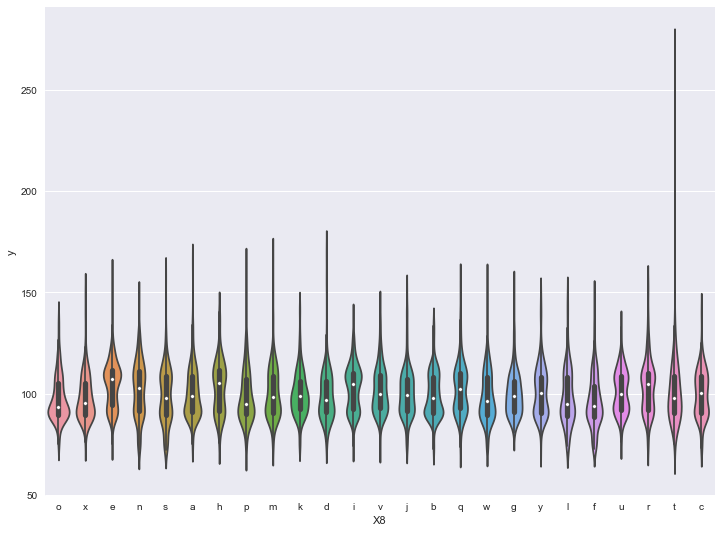

In [11]:
#Bivariate analysis - Checking distribution of categorical variables
col=['X0','X1','X2','X3','X4','X5','X6','X8']
for i in col:
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 9)
    sns.violinplot(x=i,y='y',data=df)
    plt.show()

In [12]:
# col=['X0','X1','X2','X3','X4','X5','X6','X8']
# for i in col:
#     counts_df = df.groupby(i).size().sort_values(ascending=False)
#     print counts_df

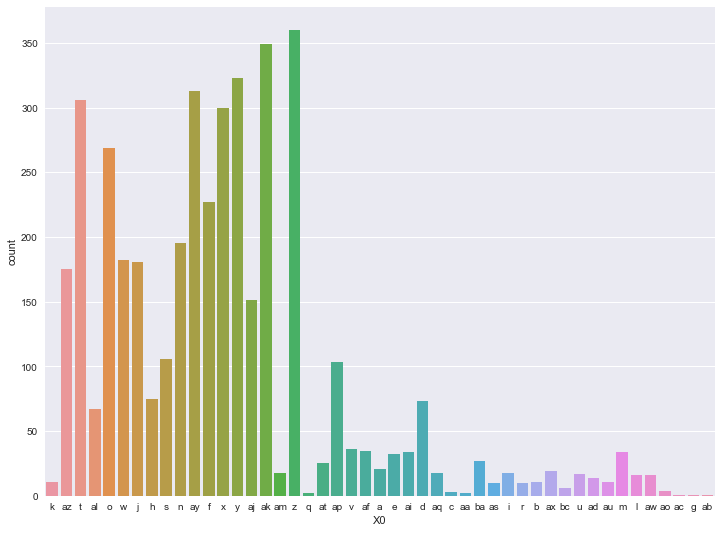

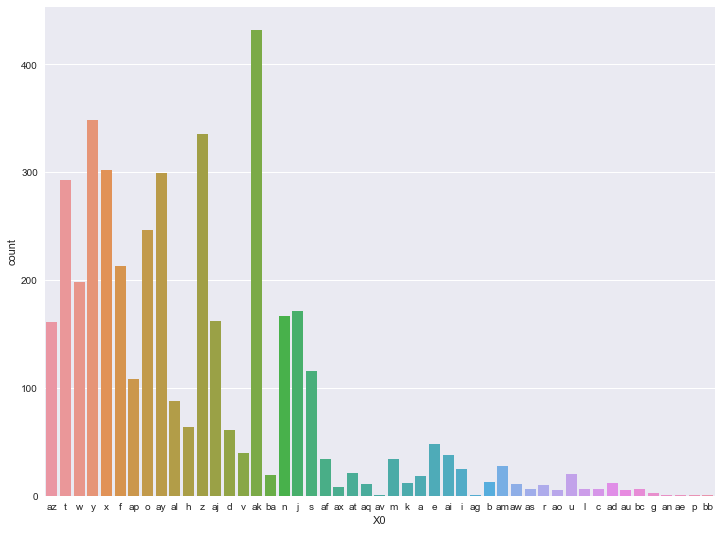

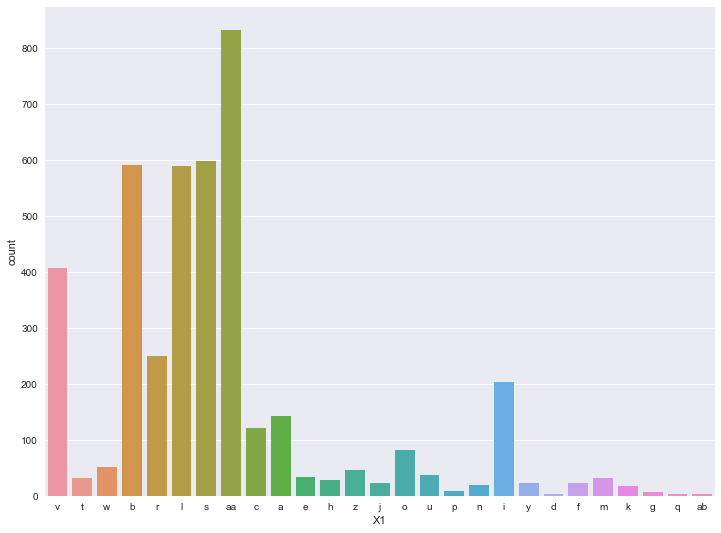

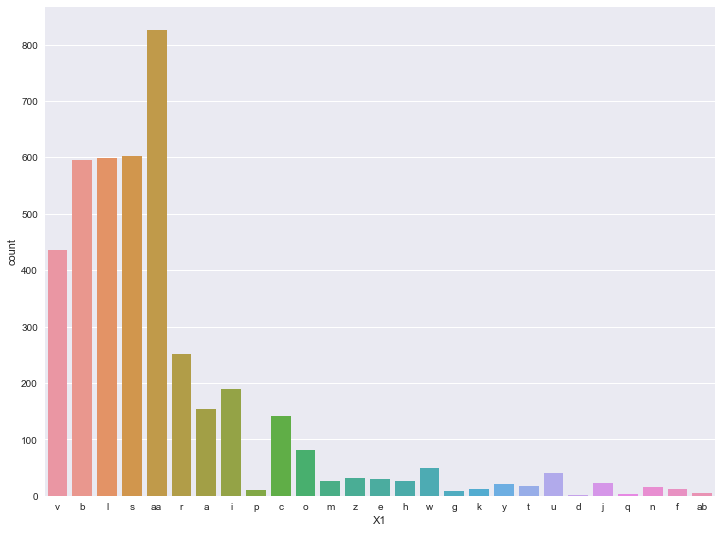

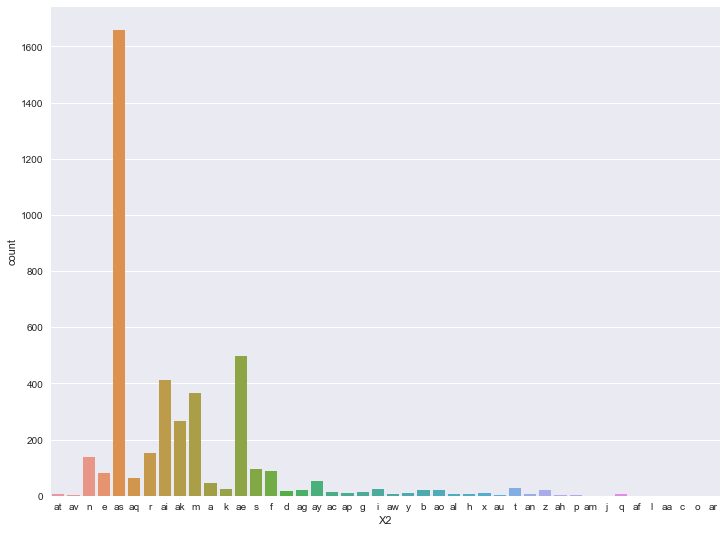

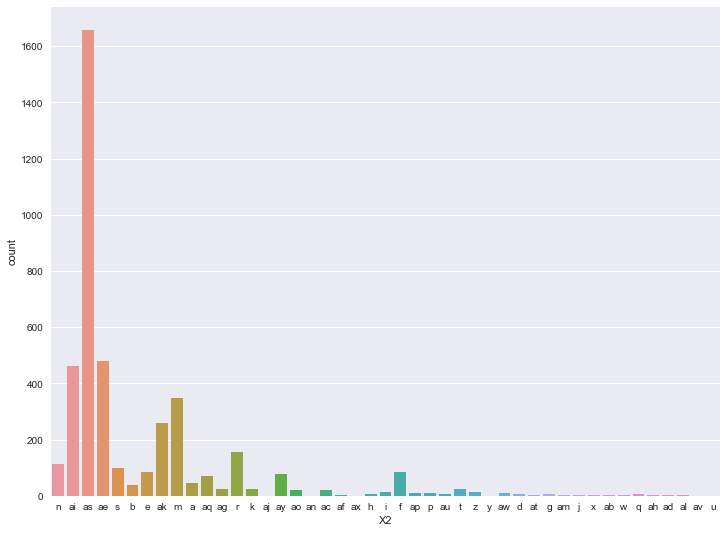

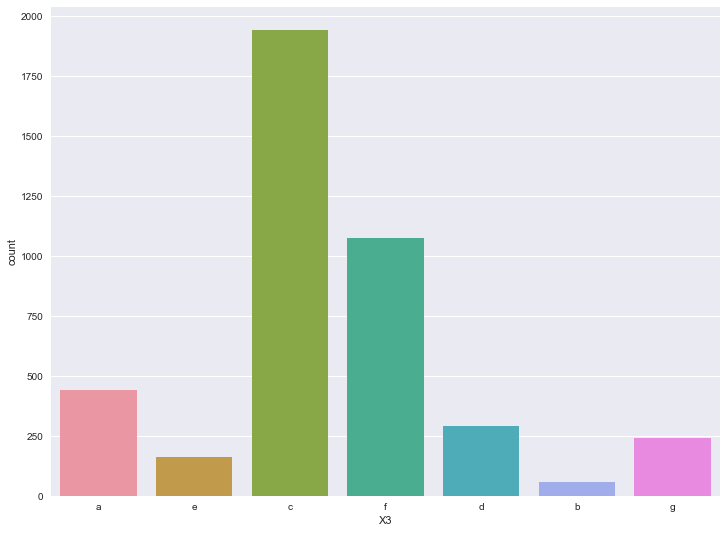

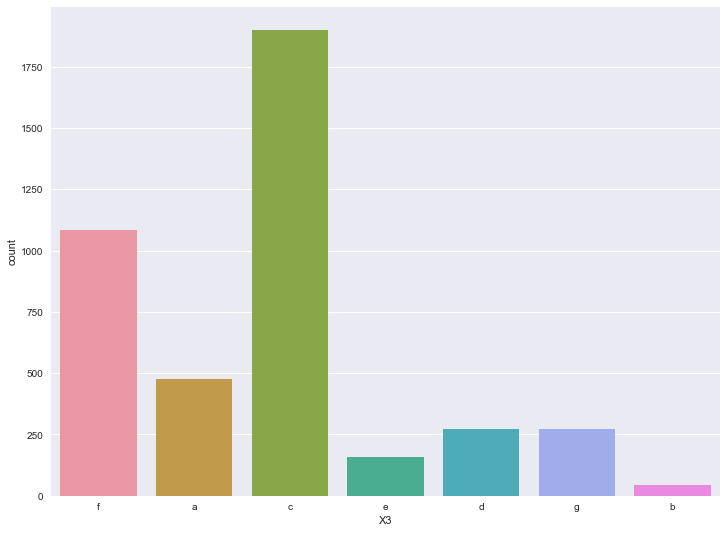

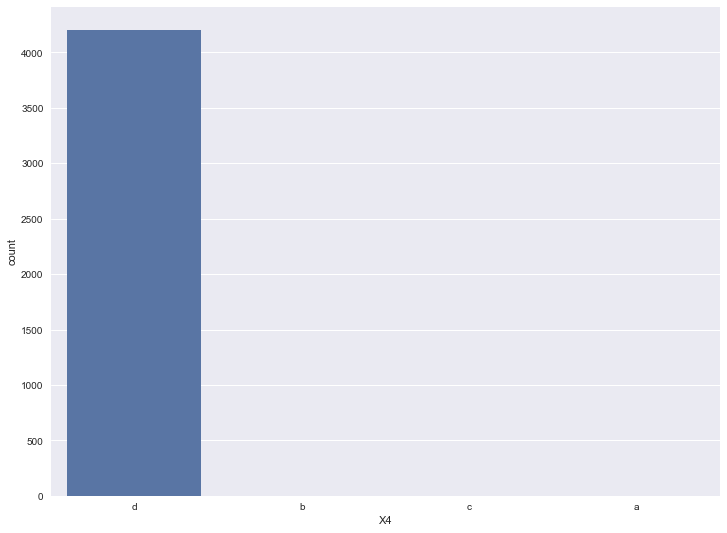

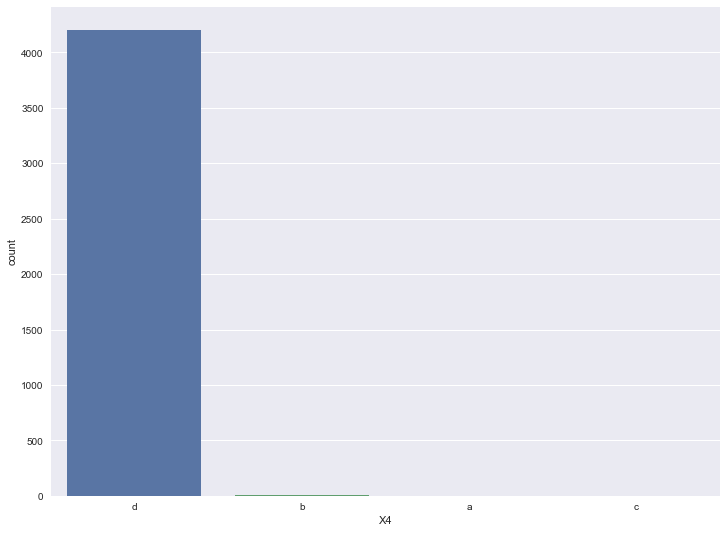

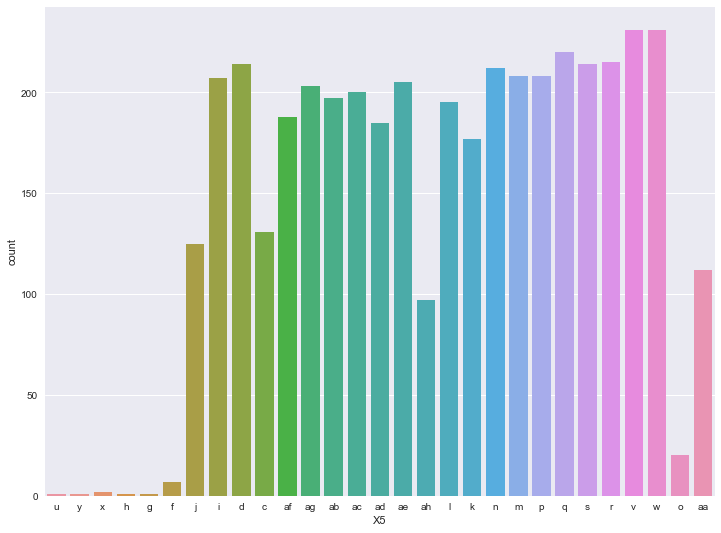

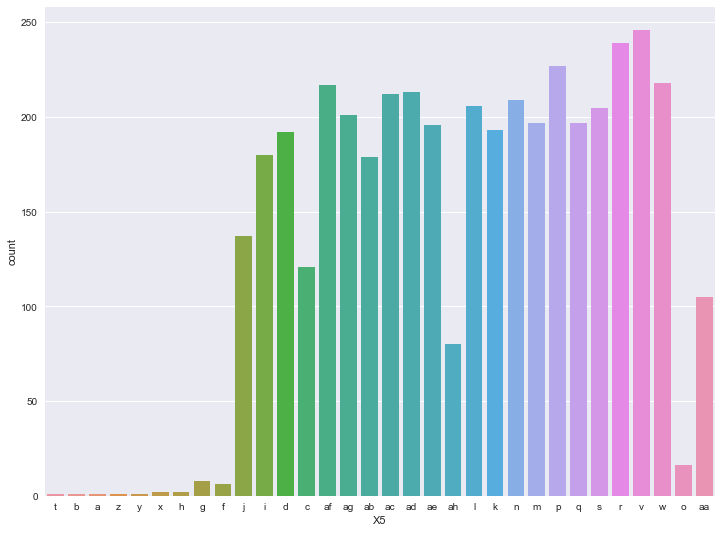

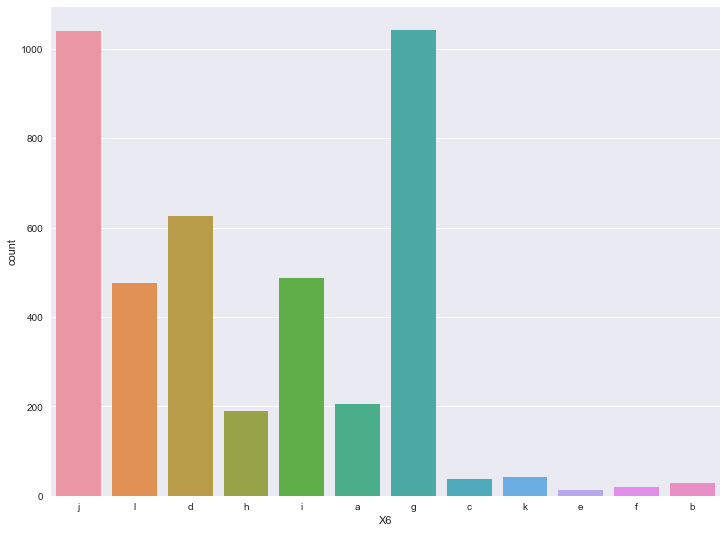

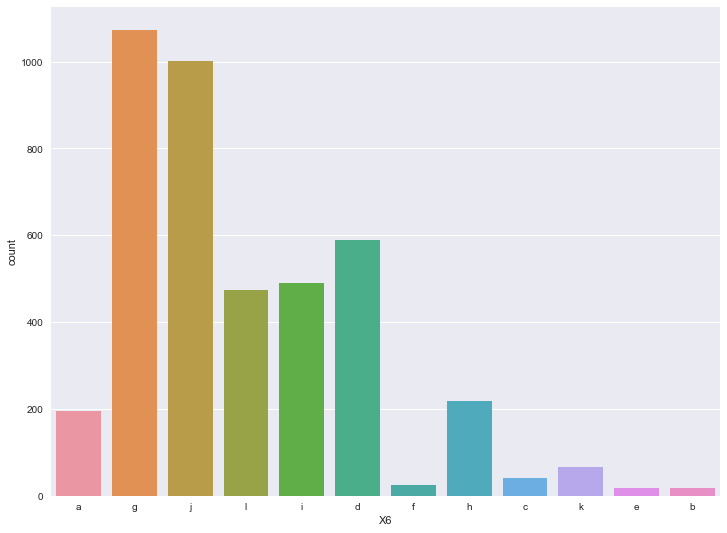

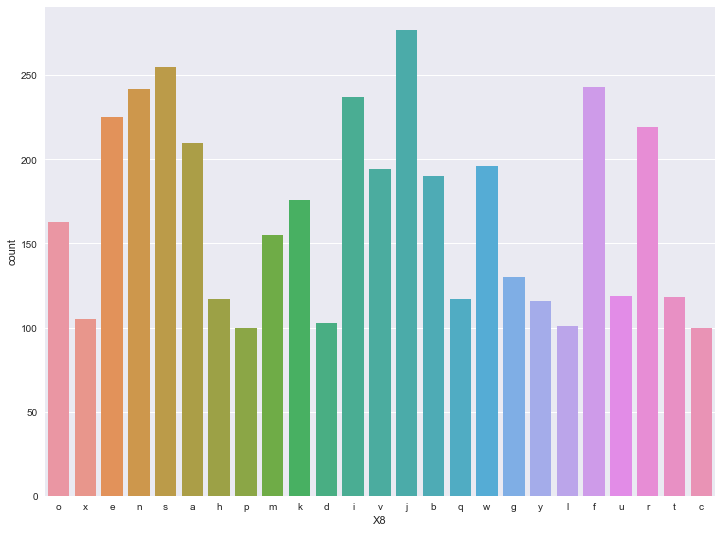

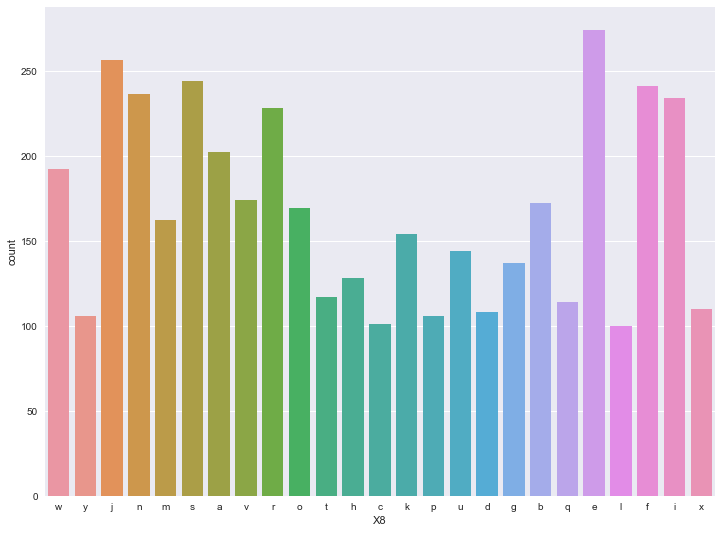

In [16]:
#Check distribution of categorical variables
col=['X0','X1','X2','X3','X4','X5','X6','X8']
for i in col:
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 9)
    sns.countplot(df[i])
    plt.show()
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 9)
    sns.countplot(df_test[i])
    plt.show()

In [17]:
df_test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df = df[df.y < 250]

In [19]:
#Creating dummy variables
dummies = pd.get_dummies(df['X0']).rename(columns=lambda x: 'X0_' + str(x))
#Adding to input variables
df = pd.concat([df, dummies], axis=1)
#Dropping column without having to reassign
df.drop(['X0'], inplace=True, axis=1)
print df.shape

(4208, 424)


In [20]:
# df.drop(['X1'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df['X1']).rename(columns=lambda x: 'X1_' + str(x))
#Adding to input variables
df = pd.concat([df, dummies], axis=1)
#Dropping column without having to reassign
df.drop(['X1'], inplace=True, axis=1)
print df.shape

(4208, 450)


In [21]:
# df.drop(['X2'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df['X2']).rename(columns=lambda x: 'X2_' + str(x))
#Adding to input variables
df = pd.concat([df, dummies], axis=1)
#Dropping column without having to reassign
df.drop(['X2'], inplace=True, axis=1)
print df.shape

(4208, 493)


In [22]:
# df.drop(['X3'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df['X3']).rename(columns=lambda x: 'X3_' + str(x))
#Adding to input variables
df = pd.concat([df, dummies], axis=1)
#Dropping column without having to reassign
df.drop(['X3'], inplace=True, axis=1)
print df.shape

(4208, 499)


In [23]:
# df.drop(['X4'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df['X4']).rename(columns=lambda x: 'X4_' + str(x))
#Adding to input variables
df = pd.concat([df, dummies], axis=1)
#Dropping column without having to reassign
df.drop(['X4'], inplace=True, axis=1)
print df.shape

(4208, 502)


In [24]:
# df.drop(['X5'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df['X5']).rename(columns=lambda x: 'X5_' + str(x))
#Adding to input variables
df = pd.concat([df, dummies], axis=1)
#Dropping column without having to reassign
df.drop(['X5'], inplace=True, axis=1)
print df.shape

(4208, 530)


In [25]:
# df.drop(['X6'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df['X6']).rename(columns=lambda x: 'X6_' + str(x))
#Adding to input variables
df = pd.concat([df, dummies], axis=1)
#Dropping column without having to reassign
df.drop(['X6'], inplace=True, axis=1)
print df.shape

(4208, 541)


In [26]:
# df.drop(['X8'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df['X8']).rename(columns=lambda x: 'X8_' + str(x))
#Adding to input variables
df = pd.concat([df, dummies], axis=1)
#Dropping column without having to reassign
df.drop(['X8'], inplace=True, axis=1)
print df.shape

(4208, 565)


In [27]:
#Training & Validation Split 
df_train, df_validate = train_test_split(df,test_size=0.30,random_state=150)
print "Train shape : ",df_train.shape
print "Validate shape : ",df_validate.shape

Train shape :  (2945, 565)
Validate shape :  (1263, 565)


In [28]:
#Separating columns not used in PCA
df_train_Y = df_train [['ID','y']]
df_validate_nonPCA = df_validate [['ID','y']]
df_validation_ID = df_validate ['ID']
df_test_ID = df_test ['ID'] #Used for final result
print df_train_Y.shape, df_validate_nonPCA.shape, df_validation_ID.shape, df_test_ID.shape

(2945, 2) (1263, 2) (1263,) (4209,)


In [29]:
#training Target
train_Y = df_train ['y']
validation_Y = df_validate ['y']
print train_Y.shape, validation_Y.shape

(2945,) (1263,)


In [30]:
# validation_Y = validation_Y.to_frame();
# type(validation_Y)
validation_Y

3545    107.68
1540    108.13
85      110.37
2583     99.49
2932     77.38
643     107.51
1438    118.61
3144    101.37
1274     92.80
3150     89.49
1621     89.62
2489     90.82
1253    106.03
4028    110.22
1860     89.01
1223    107.35
1560    125.91
3939     84.90
2815     97.07
2786     95.44
3252    108.12
3891     94.41
2719    105.89
3800    108.41
3797     87.14
1942     89.26
3142    111.38
1296    108.19
4198     97.09
3599     75.54
         ...  
1286    109.26
375     108.27
392      91.44
122     101.43
3863    104.18
3135    106.97
657     113.68
3096     91.41
3163    128.67
3095    116.34
2832     90.52
266      76.64
2996     92.66
2674    123.69
2377     90.58
116      88.78
2844     97.51
3929     90.49
2879     97.84
3343    100.35
2065     91.52
2569     87.78
264      89.81
174     100.85
3361    107.86
2215     87.15
844      97.32
1963     88.73
1115     96.23
684      96.00
Name: y, dtype: float64

In [31]:
#Include all rows but columns starting from X10 in a dataframe
df_train = df_train.loc[:,'X10':]
df_validate = df_validate.loc[:,'X10':]
print df_train.shape, df_validate.shape

(2945, 563) (1263, 563)


In [32]:
#PCA function for training dataset
def PCA_train(df_train,n):
    X_train = df_train.values
    pca = PCA(n_components=n)
    pca.fit(X_train)
    #The amount of variance that each PC explains
    var = pca.explained_variance_ratio_
    #Cumulative Variance explains
    cum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    print cum_var
    X_train_tfm = pca.fit_transform(X_train)
    X_train_tfm = pd.DataFrame(X_train_tfm)
    return X_train_tfm

In [33]:
#Principle components for training data
X_train_pca = PCA_train(df_train,100)

[ 11.38  19.2   26.55  32.4   37.25  41.46  44.79  47.56  50.12  52.3
  54.33  56.04  57.56  58.99  60.37  61.68  62.88  64.    64.97  65.9
  66.78  67.64  68.46  69.26  70.02  70.73  71.42  72.08  72.72  73.34
  73.92  74.48  74.98  75.47  75.94  76.39  76.82  77.25  77.66  78.05
  78.43  78.81  79.18  79.53  79.87  80.2   80.51  80.82  81.12  81.41
  81.69  81.97  82.24  82.5   82.76  83.01  83.25  83.49  83.72  83.95
  84.18  84.4   84.62  84.83  85.04  85.25  85.45  85.65  85.85  86.05
  86.24  86.43  86.62  86.81  86.99  87.17  87.35  87.53  87.71  87.89
  88.06  88.23  88.4   88.57  88.73  88.89  89.05  89.21  89.37  89.53
  89.68  89.83  89.98  90.13  90.28  90.42  90.56  90.7   90.84  90.98]


In [34]:
X_validate_pca = PCA_train(df_validate,100)

[ 11.31  19.16  26.55  32.56  37.67  41.81  45.14  48.11  50.56  52.81
  54.88  56.7   58.29  59.78  61.16  62.49  63.67  64.73  65.75  66.69
  67.61  68.45  69.27  70.03  70.77  71.47  72.16  72.83  73.48  74.1
  74.69  75.26  75.8   76.31  76.8   77.28  77.73  78.17  78.58  78.99
  79.38  79.75  80.11  80.46  80.81  81.15  81.48  81.8   82.1   82.4
  82.69  82.96  83.23  83.49  83.75  84.01  84.26  84.51  84.75  84.99
  85.22  85.45  85.67  85.89  86.11  86.32  86.53  86.74  86.94  87.14
  87.34  87.53  87.72  87.91  88.1   88.28  88.46  88.64  88.82  88.99
  89.16  89.33  89.5   89.66  89.82  89.98  90.14  90.29  90.44  90.59
  90.74  90.89  91.03  91.17  91.31  91.45  91.58  91.71  91.84  91.97]


In [35]:
reg = RandomForestRegressor(n_estimators=25, criterion='mse', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features="sqrt", 
                            max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=False, oob_score=False,
                            n_jobs=1, random_state=200, verbose=0, warm_start=False)
reg.fit(X_train_pca,train_Y)
valid_pred = reg.predict(X_validate_pca)

In [36]:
reg = XGBRegressor()
reg.fit(X_train_pca,train_Y)
valid_pred = reg.predict(X_validate_pca)

In [37]:
df_valid_pred = pd.DataFrame(data = valid_pred, index=df_validation_ID, dtype='float', columns =['y'])
df_valid_pred.index.name = None

In [38]:
# validation_Y.sort_values(axis = 0); validation_Y

In [39]:
mse = sqrt(mean_squared_error(validation_Y, df_valid_pred))
mae = mean_absolute_error(validation_Y, df_valid_pred)
r2 = r2_score(validation_Y, df_valid_pred)
print mse, mae, r2

12.0667590376 9.20678420453 0.036933863467


In [40]:
mse = sqrt(mean_squared_error(validation_Y, df_valid_pred))
mae = mean_absolute_error(validation_Y, df_valid_pred)
r2 = r2_score(validation_Y, df_valid_pred)
print mse, mae, r2

12.0667590376 9.20678420453 0.036933863467


In [43]:
#Creating dummy variables
dummies = pd.get_dummies(df_test['X0']).rename(columns=lambda x: 'X0_' + str(x))
#Adding to input variables
df_test = pd.concat([df_test, dummies], axis=1)
#Dropping column without having to reassign
df_test.drop(['X0'], inplace=True, axis=1)
print df_test.shape

(4209, 425)


In [44]:
#Creating dummy variables
dummies = pd.get_dummies(df_test['X1']).rename(columns=lambda x: 'X1_' + str(x))
#Adding to input variables
df_test = pd.concat([df_test, dummies], axis=1)
#Dropping column without having to reassign
df_test.drop(['X1'], inplace=True, axis=1)
print df_test.shape

(4209, 451)


In [45]:
#df_test.drop(['X2'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df_test['X2']).rename(columns=lambda x: 'X2_' + str(x))
#Adding to input variables
df_test = pd.concat([df_test, dummies], axis=1)
#Dropping column without having to reassign
df_test.drop(['X2'], inplace=True, axis=1)
print df_test.shape

(4209, 495)


In [46]:
# df_test.drop(['X3'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df_test['X3']).rename(columns=lambda x: 'X3_' + str(x))
#Adding to input variables
df_test = pd.concat([df_test, dummies], axis=1)
#Dropping column without having to reassign
df_test.drop(['X3'], inplace=True, axis=1)
print df_test.shape

(4209, 501)


In [47]:
# df_test.drop(['X4'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df_test['X4']).rename(columns=lambda x: 'X4_' + str(x))
#Adding to input variables
df_test = pd.concat([df_test, dummies], axis=1)
#Dropping column without having to reassign
df_test.drop(['X4'], inplace=True, axis=1)
print df_test.shape

(4209, 504)


In [48]:
# df_test.drop(['X5'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df_test['X5']).rename(columns=lambda x: 'X5_' + str(x))
#Adding to input variables
df_test = pd.concat([df_test, dummies], axis=1)
#Dropping column without having to reassign
df_test.drop(['X5'], inplace=True, axis=1)
print df_test.shape

(4209, 535)


In [49]:
# df_test.drop(['X6'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df_test['X6']).rename(columns=lambda x: 'X6_' + str(x))
#Adding to input variables
df_test = pd.concat([df_test, dummies], axis=1)
#Dropping column without having to reassign
df_test.drop(['X6'], inplace=True, axis=1)
print df_test.shape

(4209, 546)


In [50]:
# df_test.drop(['X8'], inplace=True, axis=1)
#Creating dummy variables
dummies = pd.get_dummies(df_test['X8']).rename(columns=lambda x: 'X8_' + str(x))
#Adding to input variables
df_test = pd.concat([df_test, dummies], axis=1)
#Dropping column without having to reassign
df_test.drop(['X8'], inplace=True, axis=1)
print df_test.shape

(4209, 570)


In [51]:
df_test = df_test.loc[:,'X10':]
print df_validate.shape

(1263, 563)


In [52]:
X_test_pca = PCA_train(df_test,100)

[ 12.06  19.7   26.9   32.66  37.63  41.62  45.04  47.95  50.39  52.59
  54.61  56.24  57.72  59.18  60.54  61.81  62.99  64.07  65.04  65.99
  66.88  67.71  68.51  69.29  70.03  70.76  71.48  72.15  72.8   73.42
  73.99  74.53  75.04  75.54  76.02  76.48  76.92  77.34  77.75  78.15
  78.52  78.89  79.24  79.58  79.92  80.24  80.56  80.88  81.18  81.47
  81.76  82.03  82.29  82.55  82.8   83.04  83.28  83.51  83.74  83.97
  84.19  84.41  84.62  84.83  85.03  85.23  85.43  85.63  85.83  86.02
  86.21  86.4   86.59  86.77  86.95  87.13  87.31  87.49  87.66  87.83  88.
  88.17  88.34  88.51  88.67  88.83  88.99  89.15  89.31  89.46  89.61
  89.76  89.91  90.06  90.21  90.35  90.49  90.63  90.77  90.91]


In [53]:
test_pred = reg.predict(X_test_pca)

In [54]:
test_Y = pd.DataFrame(test_pred)

In [55]:
test_Y.columns = ['y']

In [56]:
print test_Y, df_test_ID

               y
0      79.140228
1      93.972328
2      78.340836
3      77.614975
4      99.624588
5      94.060081
6     109.851189
7      97.850929
8     115.094704
9      94.435928
10    113.971581
11     99.490135
12     98.690742
13     96.780090
14    108.570633
15     98.596222
16    112.768883
17     98.690742
18     98.118622
19     94.647308
20     98.690742
21     98.690742
22     91.978554
23     98.690742
24     92.339493
25    114.357330
26    102.760490
27    101.929932
28     98.211685
29     80.102135
...          ...
4179  112.282059
4180   99.503235
4181   93.613731
4182   98.007210
4183   99.867393
4184  108.892166
4185   93.118637
4186   96.402893
4187  107.169182
4188  107.524818
4189   92.737686
4190  107.023834
4191   97.032135
4192   94.730675
4193  106.049057
4194  102.076294
4195   96.358223
4196  103.982254
4197  104.334389
4198  104.813889
4199   94.504524
4200   95.305229
4201   97.650597
4202  104.516968
4203  108.393471
4204  102.249535
4205   93.9723

In [1267]:
predicted_result = pd.concat([df_test_ID, test_Y], axis=1) 

In [1268]:
predicted_result.head(4)

,ID,y
0,1,95.0440
1,2,93.3616
2,3,92.7232
3,4,95.7768


In [1269]:
predicted_result.to_csv("Documents/MercedesBenz_Challenge/mb_output.csv",sep=',',index=False)

In [1270]:
df_concat = df.append(df_test, ignore_index = True)

In [908]:
df_concat

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
0,0,k,v,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.81
1,6,k,t,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,88.53
2,7,az,w,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,76.26
3,9,az,t,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,80.62
4,13,az,v,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,78.02
5,18,t,b,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,92.93
6,24,al,r,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,128.76
7,25,o,l,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,91.91
8,27,w,s,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,108.67
9,30,j,b,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,126.99


In [909]:
#Creating dummy variables
dummies = pd.get_dummies(df_concat['X0']).rename(columns=lambda x: 'X0_' + str(x))
#Adding to input variables
df_concat = pd.concat([df_concat, dummies], axis=1)
#Dropping column without having to reassign
df_concat.drop(['X0'], inplace=True, axis=1)
print df_concat.shape

(8418, 430)


In [910]:
#Creating dummy variables
dummies = pd.get_dummies(df_concat['X1']).rename(columns=lambda x: 'X1_' + str(x))
#Adding to input variables
df_concat = pd.concat([df_concat, dummies], axis=1)
#Dropping column without having to reassign
df_concat.drop(['X1'], inplace=True, axis=1)
print df_concat.shape

(8418, 456)


In [911]:
#Creating dummy variables
dummies = pd.get_dummies(df_concat['X2']).rename(columns=lambda x: 'X2_' + str(x))
#Adding to input variables
df_concat = pd.concat([df_concat, dummies], axis=1)
#Dropping column without having to reassign
df_concat.drop(['X2'], inplace=True, axis=1)
print df_concat.shape

(8418, 505)


In [912]:
#Creating dummy variables
dummies = pd.get_dummies(df_concat['X3']).rename(columns=lambda x: 'X3_' + str(x))
#Adding to input variables
df_concat = pd.concat([df_concat, dummies], axis=1)
#Dropping column without having to reassign
df_concat.drop(['X3'], inplace=True, axis=1)
print df_concat.shape

(8418, 511)


In [913]:
#Creating dummy variables
dummies = pd.get_dummies(df_concat['X4']).rename(columns=lambda x: 'X4_' + str(x))
#Adding to input variables
df_concat = pd.concat([df_concat, dummies], axis=1)
#Dropping column without having to reassign
df_concat.drop(['X4'], inplace=True, axis=1)
print df_concat.shape

(8418, 514)


In [914]:
#Creating dummy variables
dummies = pd.get_dummies(df_concat['X5']).rename(columns=lambda x: 'X5_' + str(x))
#Adding to input variables
df_concat = pd.concat([df_concat, dummies], axis=1)
#Dropping column without having to reassign
df_concat.drop(['X5'], inplace=True, axis=1)
print df_concat.shape

(8418, 546)


In [915]:
#Creating dummy variables
dummies = pd.get_dummies(df_concat['X6']).rename(columns=lambda x: 'X6_' + str(x))
#Adding to input variables
df_concat = pd.concat([df_concat, dummies], axis=1)
#Dropping column without having to reassign
df_concat.drop(['X6'], inplace=True, axis=1)
print df_concat.shape

(8418, 557)


In [916]:
#Creating dummy variables
dummies = pd.get_dummies(df_concat['X8']).rename(columns=lambda x: 'X8_' + str(x))
#Adding to input variables
df_concat = pd.concat([df_concat, dummies], axis=1)
#Dropping column without having to reassign
df_concat.drop(['X8'], inplace=True, axis=1)
print df_concat.shape

(8418, 581)


In [917]:
#Checking for null values
mis_val_1 = df_concat.isnull().any().value_counts()  
mis_val_2 = (len(df_concat.index)-df_concat.count()).sort_values(ascending=False).values.tolist()
print mis_val_1
print mis_val_2

False    580
True       1
dtype: int64
[4209, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [918]:
df_concat.dropna(axis=1, how='any')

,ID,X10,X100,X101,X102,X103,X104,X105,X106,X107,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,18,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,24,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,25,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,27,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,30,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [919]:
df_concat.describe()

,ID,X10,X100,X101,X102,X103,X104,X105,X106,X107,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
count,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,...,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000,8418.000000
mean,4208.500000,0.016156,0.686743,0.936208,0.006415,0.786410,0.002257,0.001307,0.012711,0.000475,...,0.024471,0.027441,0.053100,0.059278,0.028035,0.031243,0.043716,0.046092,0.025541,0.026372
std,2430.211616,0.126082,0.463846,0.244396,0.079840,0.409865,0.047458,0.036127,0.112030,0.021795,...,0.154517,0.163375,0.224247,0.236158,0.165083,0.173983,0.204474,0.209696,0.157769,0.160249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2104.250000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4208.500000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6312.750000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [920]:
df_concat.drop(['y'],axis=1)

,ID,X10,X100,X101,X102,X103,X104,X105,X106,X107,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,18,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,24,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,25,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,27,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,30,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [921]:
#PCA function for training dataset
def PCA_train(df_train,n):
    X_train = df_train.values
    pca = PCA(n_components=n)
    pca.fit(X_train)
    #The amount of variance that each PC explains
    var = pca.explained_variance_ratio_
    #Cumulative Variance explains
    cum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    print cum_var
    X_train_tfm = pca.fit_transform(X_train)
    X_train_tfm = pd.DataFrame(X_train_tfm)
    return X_train_tfm

In [922]:
df_concat = df_concat.drop(['y','ID'],1)

In [923]:
PCA_train(df_concat,100)

[ 11.68  19.25  26.65  32.44  37.4   41.49  44.86  47.72  50.19  52.36
  54.4   56.08  57.56  59.01  60.38  61.66  62.84  63.92  64.9   65.83
  66.71  67.54  68.34  69.11  69.86  70.57  71.28  71.94  72.58  73.21
  73.78  74.32  74.82  75.31  75.78  76.23  76.66  77.08  77.48  77.88
  78.26  78.63  78.99  79.34  79.68  80.01  80.33  80.64  80.94  81.23
  81.51  81.78  82.05  82.3   82.55  82.79  83.03  83.26  83.49  83.71
  83.93  84.15  84.36  84.57  84.77  84.97  85.17  85.37  85.56  85.75
  85.94  86.13  86.31  86.49  86.67  86.85  87.03  87.2   87.37  87.54
  87.71  87.88  88.05  88.22  88.38  88.54  88.7   88.86  89.02  89.18
  89.34  89.49  89.64  89.79  89.94  90.09  90.23  90.37  90.51  90.65]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.817512,-0.074630,2.417421,0.802003,1.461387,-0.065436,0.581589,-1.001919,0.118512,-0.296612,...,-0.094684,-0.016287,0.683673,0.017701,0.381049,-0.052056,0.632534,0.064615,0.008055,0.714208
1,-0.063560,1.101389,0.663174,-0.802884,0.125447,0.143973,1.158050,-0.653977,-0.056936,0.612686,...,-0.037427,0.235578,-0.021915,0.152502,0.333996,0.077927,0.236604,-0.063664,0.224843,0.017285
2,-0.627300,1.004104,2.864411,2.035641,0.415964,3.879226,-1.268668,0.631085,-1.063903,-0.298383,...,0.266762,-0.084122,0.152972,-0.208659,0.357812,-0.030319,0.026831,0.170696,-0.476257,0.126184
3,-0.409460,1.895754,1.969471,2.581503,-0.457382,3.920859,-0.387820,-0.058787,-1.338770,0.128686,...,0.008913,-0.032742,0.120762,0.286430,0.128949,0.384728,0.009494,-0.283222,-0.324285,0.571806
4,-0.446164,1.979632,1.809210,2.797106,-0.697535,4.001273,-0.566803,0.136267,-1.943471,-0.365366,...,0.162605,-0.011193,0.110112,0.053113,-0.018077,-0.000290,0.067889,0.043672,0.028410,0.245434
5,1.987816,-1.534357,-0.728140,0.340669,-1.151973,-0.236395,0.327735,-1.001754,-0.929846,0.518722,...,-0.083383,0.147672,0.120174,0.099964,0.154254,-0.243846,0.251067,-0.286130,-0.026463,0.044820
6,0.494205,2.476608,-1.181789,0.714786,-0.272795,-0.711563,-0.316112,0.964900,0.324555,0.148025,...,0.234599,0.213851,0.416589,-0.074846,-0.134906,-0.276699,0.441107,-0.318546,0.224568,0.071089
7,-2.687419,0.259183,-0.176231,-0.310618,-0.634699,-1.471953,-0.765968,0.001395,-1.580696,0.634069,...,-0.073870,0.000134,0.054531,-0.150516,-0.078118,-0.167596,0.234555,-0.026292,0.034646,0.076573
8,-3.058974,-1.098786,0.623550,-1.623232,0.725974,0.352823,-0.617439,0.295986,-0.277427,-0.548309,...,-0.272239,0.253764,-0.152568,0.133375,0.309520,-0.093024,-0.029104,-0.044701,0.001555,0.152481
9,1.698050,-2.421189,0.061934,0.614617,-0.565789,-0.090057,0.210868,0.676627,-0.009103,-0.305796,...,-0.136954,0.165375,-0.068303,-0.246094,0.070412,-0.203901,-0.110703,-0.037093,0.303498,0.132858


In [924]:
df_concat

,X10,X100,X101,X102,X103,X104,X105,X106,X107,X108,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
